### Data Dictionary Olympics Trend
ID - Unique number for each athlete

Name - Athlete's name

Sex - M or F

Age - Integer

Height - In centimeters

Weight - In kilograms

Team - Team name

NOC - National Olympic Committee 3-letter code

Games - Year and season

Year - Integer

Season - Summer or Winter

City - Host city

Sport - Sport

Event - Event

Medal - Gold, Silver, Bronze, or NA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

olympics = pd.read_csv('Athelete_csv/athlete_events.csv')
noc_region = pd.read_csv('Athelete_csv/noc_regions.csv')

In [2]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
noc_region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
#nulls in olympics data
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
#we have nulls in Age,Height,Weight,Medal
#Count as not win = NW in Medal that has nulls, and drop the 3rd column in noc_region
olympics['Medal'].fillna('NW', inplace = True)
noc_region.drop('notes', axis = 1 , inplace = True)

#we can merge these two tables, using leftjoin, setting PK = NOC
merge_olympics = pd.merge(olympics, noc_region, on='NOC', how='left')


In [6]:
merge_olympics=pd.merge(olympics, noc_region, on='NOC', how='left')
merge_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NW,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NW,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NW,Netherlands


In [7]:
#Let's have a look at gold medalist, and age distribution
Gold_M = merge_olympics[(merge_olympics.Medal == 'Gold')]
Gold_M.isnull().sum() #We have some nulls in Age, let's look at age distribution 

ID           0
Name         0
Sex          0
Age        148
Height    2833
Weight    3118
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
region       1
dtype: int64

Text(0.5, 1.0, 'Distribution of Gold Medals')

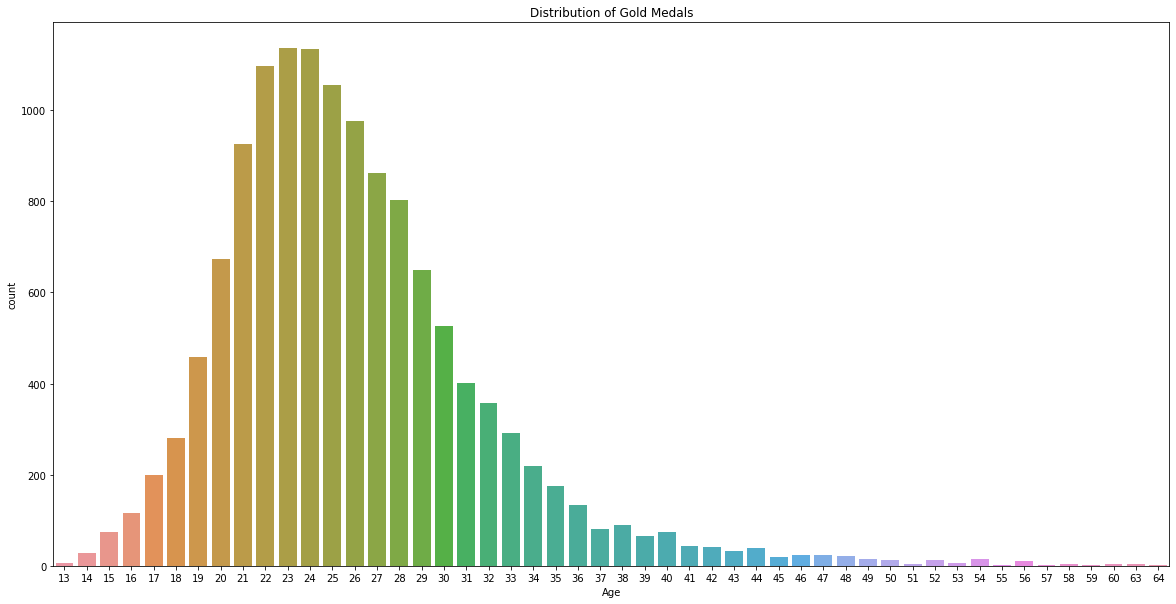

In [8]:
Gold_M = Gold_M[np.isfinite(Gold_M['Age'])]
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(Gold_M['Age'].astype('int')) #plotting age as integer.
plt.title('Distribution of Gold Medals')

In [9]:
#Let's look at top 5 countries with most medels. Starting with Gold, and total medals after.

Gold_M.region.value_counts().reset_index(name='Medal').head(10)



,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491
6,Sweden,479
7,Canada,461
8,Hungary,432
9,Norway,378


Text(0.5, 1, 'Medals per Country')

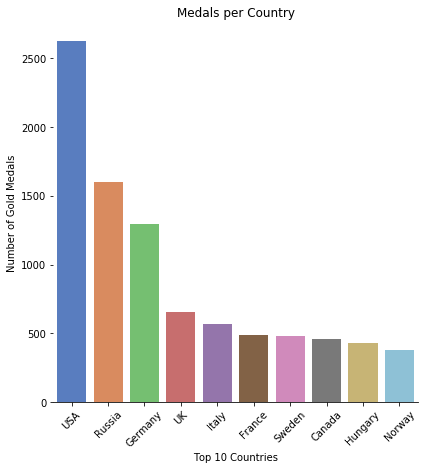

In [10]:
Tot_Gold_M = Gold_M.region.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=Tot_Gold_M,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
plt.xticks(rotation=45)
g.set_xlabels("Top 10 Countries")
g.set_ylabels("Number of Gold Medals")
plt.title('Medals per Country')

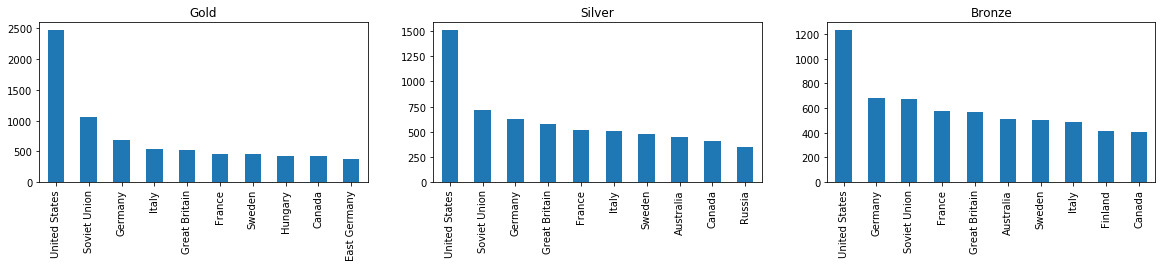

In [11]:
#Distribution of Gold,Silver and Bronze medal
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(3,3,1)
ax1.set_title('Gold')
pd.value_counts(merge_olympics[merge_olympics.Medal=='Gold']['Team']).head(10).plot.bar();
ax2 = fig.add_subplot(3,3,2)
ax2.set_title('Silver')
pd.value_counts(merge_olympics[merge_olympics.Medal=='Silver']['Team']).head(10).plot.bar();
ax3 = fig.add_subplot(3,3,3)
ax3.set_title('Bronze')
pd.value_counts(merge_olympics[merge_olympics.Medal=='Bronze']['Team']).head(10).plot.bar();

In [12]:
#We look at distribution of participation, yearly trend, and summer vs winter olympics.
#counting, if 1 then won the medal otherwise 0
def gold_m(merge_olympics)  :
    if merge_olympics["Medal"] == "Gold" :
        return 1 
    else :
        return 0
def silver_m(merge_olympics)  :
    if merge_olympics["Medal"] == "Silver" :
        return 1 
    else :
        return 0
def bronze_m(merge_olympics)  :
    if merge_olympics["Medal"] == "Bronze" :
        return 1 
    else :
        return 0
    
merge_olympics["Gold"]   = merge_olympics.apply(lambda merge_olympics:gold_m(merge_olympics),axis = 1) 
merge_olympics["Silver"] = merge_olympics.apply(lambda merge_olympics:silver_m(merge_olympics),axis = 1) 
merge_olympics["Bronze"] = merge_olympics.apply(lambda merge_olympics:bronze_m(merge_olympics),axis = 1) 
merge_olympics["Total"] = merge_olympics["Gold"] + merge_olympics["Silver"] +merge_olympics["Bronze"]

#splitting summer and winter olympics

summer = merge_olympics[merge_olympics["Season"] == "Summer"]
winter = merge_olympics[merge_olympics["Season"] == "Winter"]

In [13]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Gold,Silver,Bronze,Total
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NW,China,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NW,China,0,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NW,Denmark,0,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,0,0,1
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NW,Netherlands,0,0,0,0


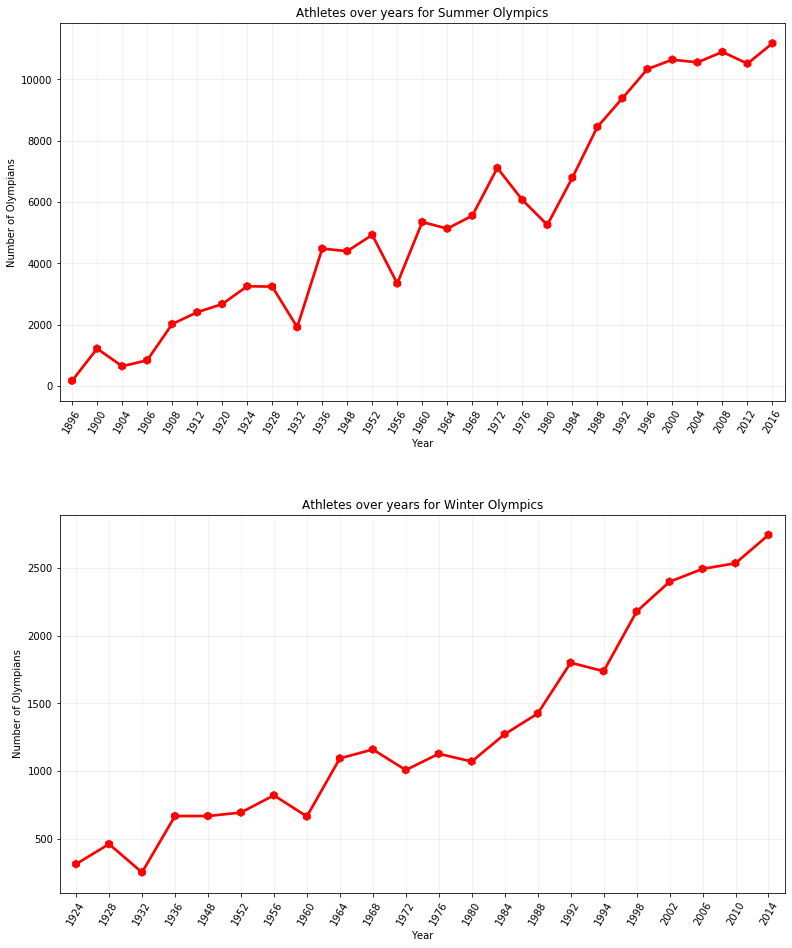

In [14]:
#summer and winter counts by year and althetes ID
summer_count = summer.groupby(["Year"])["ID"].nunique().reset_index()
winter_count = winter.groupby(["Year"])["ID"].nunique().reset_index()

fig = plt.figure(figsize=(13,16))
plt.subplot(211)
ax = sns.pointplot(x = summer_count["Year"] , y = summer_count["ID"],
                   color="red",markers="h")
plt.xticks(rotation = 60)
plt.grid(True,alpha=.2)
plt.ylabel("Number of Olympians")
plt.title("Athletes over years for Summer Olympics")

plt.subplot(212)
ax1 = sns.pointplot(x = winter_count["Year"] , y = winter_count["ID"],
                    color = "red",markers="h")
plt.xticks(rotation = 60)
plt.grid(True,alpha=.2)
plt.ylabel("Number of Olympians")
plt.title("Athletes over years for Winter Olympics")
plt.subplots_adjust(hspace = .3)
plt.show()

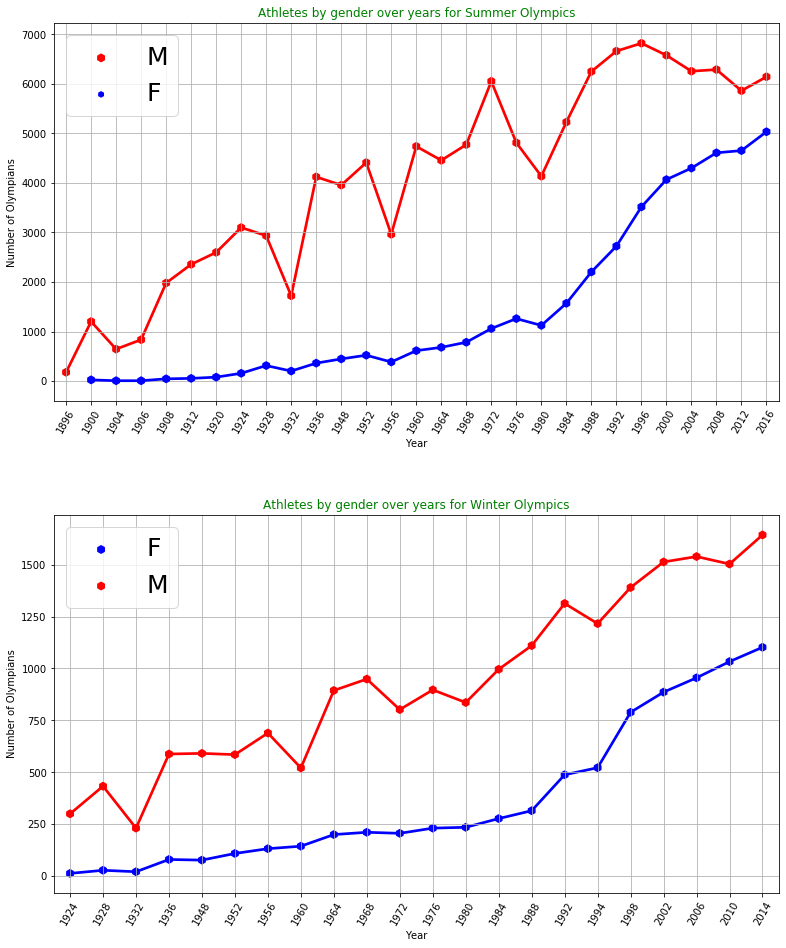

In [15]:
#groupping by gender in summer and winter
summer_gender_count = summer.groupby(["Year","Sex"])["ID"].nunique().reset_index()
winter_gender_count = winter.groupby(["Year","Sex"])["ID"].nunique().reset_index()

fig = plt.figure(figsize=(13,16))
plt.subplot(211)
ax = sns.pointplot(x = summer_gender_count["Year"] , y = summer_gender_count["ID"],
                   markers="h" , hue = summer_gender_count["Sex"],palette = ["r","b"])
plt.grid(True)
plt.xticks(rotation = 60)
plt.ylabel("Number of Olympians")
plt.title("Athletes by gender over years for Summer Olympics",color="g")
plt.legend(loc = "best" ,prop={"size":25})

plt.subplot(212)
ax1 = sns.pointplot(x = winter_gender_count["Year"] , y = winter_gender_count["ID"],
                    markers="h",palette = ["b","r"],
                   hue = winter_gender_count["Sex"])
plt.xticks(rotation = 60)
plt.grid(True)
plt.ylabel("Number of Olympians")
plt.title("Athletes by gender over years for Winter Olympics",color="g")
plt.legend(loc = "best" ,prop={"size":25})
plt.subplots_adjust(hspace = .3)
plt.show()

In [16]:
#Let's have a look at the gender trend in Canada

summer_gender_count = summer.groupby(["Year","Sex","region"])["ID"].nunique().reset_index()
winter_gender_count = winter.groupby(["Year","Sex","region"])["ID"].nunique().reset_index()

summer_Canada = summer_gender_count[summer_gender_count['region']=='Canada']
winter_Canada = winter_gender_count[winter_gender_count['region']=='Canada']

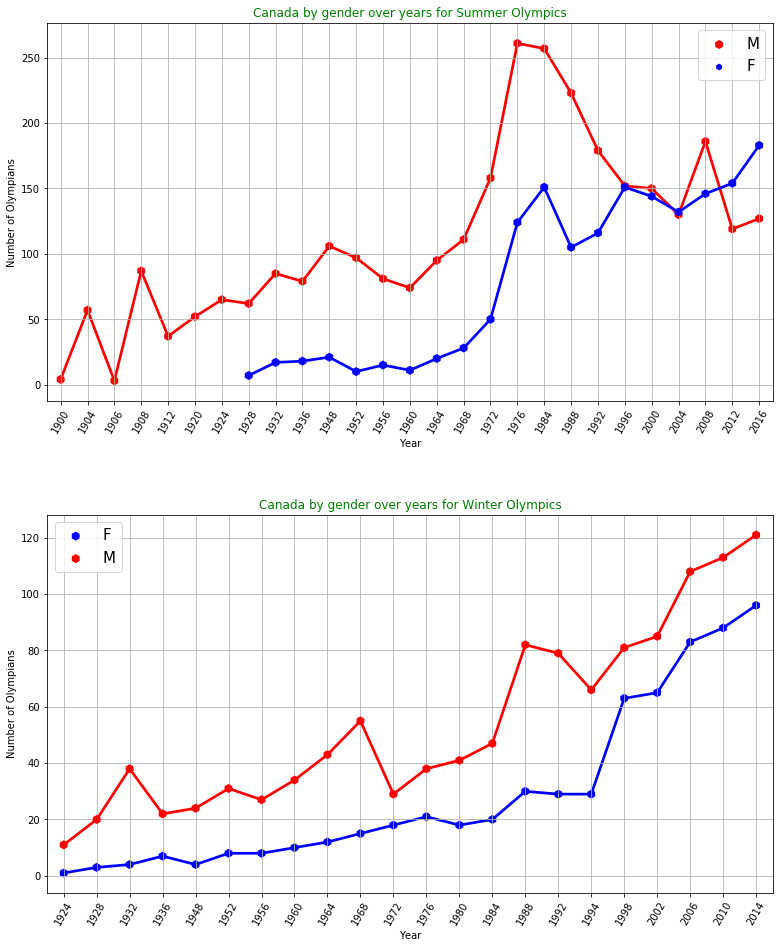

In [17]:
fig = plt.figure(figsize=(13,16))
plt.subplot(211)
ax = sns.pointplot(x = summer_Canada["Year"] , y = summer_Canada["ID"],
                   markers="h" , hue = summer_Canada["Sex"],palette = ["r","b"])
plt.grid(True)
plt.xticks(rotation = 60)
plt.ylabel("Number of Olympians")
plt.title("Canada by gender over years for Summer Olympics",color="g")
plt.legend(loc = "best" ,prop={"size":15})

plt.subplot(212)
ax1 = sns.pointplot(x = winter_Canada["Year"] , y = winter_Canada["ID"],
                    markers="h",palette = ["b","r"],
                   hue = winter_Canada["Sex"])
plt.xticks(rotation = 60)
plt.grid(True)
plt.ylabel("Number of Olympians")
plt.title("Canada by gender over years for Winter Olympics",color="g")
plt.legend(loc = "best" ,prop={"size":15})
plt.subplots_adjust(hspace = .3)
plt.show()


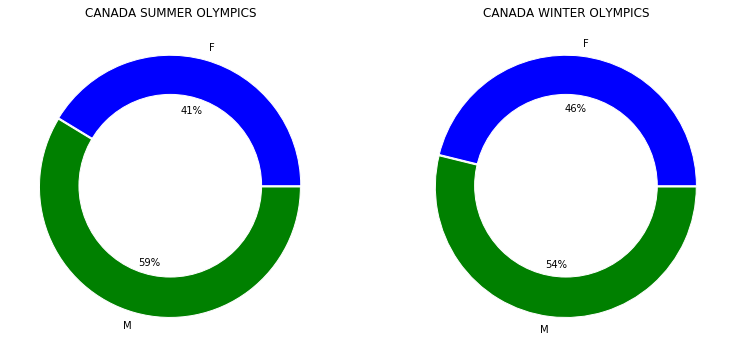

In [18]:
plt.figure(figsize=(13,6))
plt.subplot(121)
summer_Canada.groupby("Sex")["ID"].nunique().plot.pie(autopct = "%1.0f%%",
                                               wedgeprops = {"linewidth":1,"edgecolor":"w"},
                                              explode = [0,.01],shadow = False , 
                                               colors = ["blue","Green"]) 
plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title("CANADA SUMMER OLYMPICS")

plt.subplot(122)
winter_Canada.groupby("Sex")["ID"].nunique().plot.pie(autopct = "%1.0f%%",
                                               wedgeprops = {"linewidth":1,"edgecolor":"w"},
                                              explode = [0,.01],shadow = False , 
                                               colors = ["blue","Green"]) 
plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title("CANADA WINTER OLYMPICS")

plt.show()

In [19]:
summer_gender_count = summer.groupby(["Year","Sex","region","Name","Medal","Sport"])["ID"].nunique().reset_index()
winter_gender_count = winter.groupby(["Year","Sex","region","Name","Medal","Sport"])["ID"].nunique().reset_index()

summer_Canada = summer_gender_count[summer_gender_count['region']=='Canada']
winter_Canada = winter_gender_count[winter_gender_count['region']=='Canada']


In [20]:
#Summer Canadian Olympians medal counts
summer_Canada.groupby('Name')['Medal'].count().nlargest(5).reset_index()


,Name,Medal
0,Ian Millar,11
1,"James Robert ""Jim"" Elder",8
2,Lesley Allison Thompson-Willie,8
3,Caroline Brunet,7
4,Daniel Mark Nestor,7


In [21]:
#Winter Canadian Olympians medal counts

winter_Canada.groupby('Name')['Medal'].count().nlargest(10).reset_index()

,Name,Medal
0,Catriona Ann Le May Doan,7
1,Clara Hughes,7
2,Denny Morrison,7
3,Marc Gagnon,7
4,Pierre Fritz Lueders,7
5,Tania Vicent,7
6,Charles Hamelin,6
7,"Cynthia Nicole ""Cindy"" Klassen",6
8,Gatan T. Boucher,6
9,Isabelle Charest (-Charbonneau),6
